# Extra (Optional Work)

As you examine the data, you are overcome with a creeping suspicion that the dataset is fake. You surmise that your boss handed you spurious data in order to test the data engineering skills of a new employee. To confirm your hunch, you decide to take the following steps to generate a visualization of the data, with which you will confront your boss:

1. Import the SQL database into Pandas. (Yes, you could read the CSVs directly in Pandas, but you are, after all, trying to prove your technical mettle.) This step may require some research. Feel free to use the code below to get started. Be sure to make any necessary modifications for your username, password, host, port, and database name:

   ```sql
   from sqlalchemy import create_engine
   engine = create_engine('postgresql://localhost:5432/<your_db_name>')
   connection = engine.connect()
   ```

* Consult [SQLAlchemy documentation](https://docs.sqlalchemy.org/en/latest/core/engines.html#postgresql) for more information.

* If using a password, do not upload your password to your GitHub repository. See [https://www.youtube.com/watch?v=2uaTPmNvH0I](https://www.youtube.com/watch?v=2uaTPmNvH0I) and [https://help.github.com/en/github/using-git/ignoring-files](https://help.github.com/en/github/using-git/ignoring-files) for more information.

### Import dependencies

In [41]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
from config import db_password

In [42]:
db_user = 'postgres'
db_host = 'localhost'
db_port = 5432

db_name = "SQL_Homework(9)"

engine = create_engine(f"postgres://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")
connection = engine.connect()

In [43]:
data_employees = pd.read_sql("SELECT * FROM employees", engine)
data_employees.head()

,emp_no,title_id,birth_date,fist_name,last_name,sex,hire_date
0,249484.0,s0002,1961-08-04,Phuoc,Miculan,M,1987-05-03
1,31627.0,e0004,1960-08-03,Kellie,Silva,M,1990-07-25
2,420245.0,e0004,1961-02-22,Kristian,Pero,M,1986-12-04
3,299732.0,s0001,1952-07-19,Mang,Sidhu,F,1987-04-22
4,36968.0,s0001,1952-07-21,Shin,Siprelle,M,1985-04-16


In [44]:
data_salaries = pd.read_sql("SELECT * FROM salaries", engine)
data_salaries.head()

,emp_no,salary
0,10001.0,"$60,117.00"
1,10002.0,"$65,828.00"
2,10003.0,"$40,006.00"
3,10004.0,"$40,054.00"
4,10005.0,"$78,228.00"


In [45]:
data_title = pd.read_sql("SELECT * FROM titles", engine)
data_title.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [ ]:
#2. Create a histogram to visualize the most common salary ranges for employees.

In [11]:
combined_data = pd.merge(data_employees, data_title, on="title_id", how="outer")

combined_data2 = pd.merge(combined_data, data_salaries, on="emp_no", how="outer")
combined_data2.head()

,emp_no,title_id,birth_date,fist_name,last_name,sex,hire_date,title,salary
0,249484.0,s0002,1961-08-04,Phuoc,Miculan,M,1987-05-03,Senior Staff,"$53,893.00"
1,450092.0,s0002,1957-04-03,Danco,Peha,M,1985-10-05,Senior Staff,"$40,000.00"
2,26883.0,s0002,1964-02-01,Mohua,Versino,M,1991-07-07,Senior Staff,"$40,000.00"
3,288296.0,s0002,1963-07-17,Shahar,Hutton,F,1986-09-16,Senior Staff,"$40,000.00"
4,90347.0,s0002,1959-03-29,Mari,Nanard,F,1986-04-06,Senior Staff,"$43,064.00"


In [22]:
combined_data2.dtypes

emp_no        float64
title_id       object
birth_date     object
fist_name      object
last_name      object
sex            object
hire_date      object
title          object
salary         object
dtype: object

In [ ]:
#3. Create a bar chart of average salary by title.

In [32]:
# convert the salary datatype from object to float
import locale
import pandas as pd
locale.setlocale(locale.LC_ALL,'')
combined_data2['salary']=combined_data2.salary.map(lambda x: locale.atof(x.strip('$')))

In [33]:
combined_data2.dtypes

emp_no        float64
title_id       object
birth_date     object
fist_name      object
last_name      object
sex            object
hire_date      object
title          object
salary        float64
dtype: object

In [36]:
#calculate salary mean, group by the job title
salary_group = combined_data2.groupby("title")["salary"].mean()
salary_group.head()

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Name: salary, dtype: float64

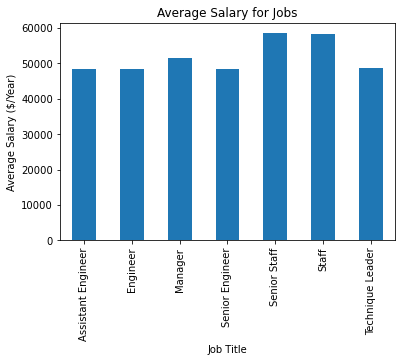

In [40]:
#create the bar chart 
salary_group.plot(kind="bar")
plt.xlabel("Job Title")
plt.ylabel("Average Salary ($/Year)")
plt.title("Average Salary for Jobs")

plt.savefig("#3 - Average Salary")
plt.show()

In [ ]:
plt.hist(data_salaries["salary"], label="Salary($)")
plt.xlabel("Salary($)")
plt.ylabel("Num of Employees")
plt.legend()
plt.title("Salary Ranges")

plt.show

In [ ]:


plt.bar(x=x_axis,height=users, color='r', alpha=0.5, align="center")